In [1]:
"""
该代码用于绘制AD-Alterome中Alteration的丰都统计柱状图

"""

'\n该代码用于绘制AD-Alterome中Alteration的丰都统计柱状图\n\n'

In [192]:
import os
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.patches as mpatches


In [193]:
db_path = '/mnt/disk1/xzyao/AD-PNRLE/AD-Alterome调整-2024/db_file'

db_file = f'{db_path}/ad-alterome.db.only-gare.tsv'

In [194]:

# snp: rs_snp
# epi: meth
type_to_sub_type = defaultdict(set)

# rs_snp: 13
# meth: 25
sub_type_count = defaultdict(int)

alter_set = set()
alter_count = defaultdict(int)
cancer_to_alter_set = defaultdict(set)
cancer_to_alter_count = defaultdict(int)

selected_alt_type = {'point mutations', 'expression changes', 'epigenic marks', 'copy number variation', 'snp'}

In [195]:

# snp: rs_snp
# epi: meth
type_to_sub_type = defaultdict(set)

# rs_snp: 13
# meth: 25
sub_type_count = defaultdict(int)


#pattern = r'^[A-Za-z]+[0-9]+[A-Za-z]+$'
pattern = r'[A-Za-z]+[0-9]+[A-Za-z]+'

# 匹配不上的标准化突变
miss_alt_set = set()
with open(db_file) as f:
    head = f.readline().strip().split('\t')
    #print(head)

    for line in f:
        l = line.strip().split('\t')
        alt_mention = l[2]
        alt_id = l[3]
        alt_type = l[4]

        if 'Normalized Variants' in alt_type:

            alt_type, sub_type = alteration_type.split(':')

            if alt_mention.lower().startswith('rs') or alt_id.lower().startswith('rs'):
                sub_type = 'RsID Normalized'
            elif alt_mention.lower().startswith('p.') or alt_id.lower().startswith('p.'):
                sub_type = 'protein change'
            elif alt_mention.lower().startswith('c.') or alt_id.lower().startswith('c.'):
                sub_type = 'cDNA change'
            elif alt_mention.lower().startswith('g.') or alt_id.lower().startswith('g.'):
                sub_type = 'DNA change'
            elif re.match(pattern, alt_mention):
                sub_type = 'protein change'
            else:
                miss_alt_set.add((alt_mention, alt_id, alt_type))
                #print(alt_mention)
                #print(alt_id)
                #print(alt_type)
                #input()
        else:
            alt_type, sub_type = alt_type.split(':')

            sub_type = sub_type.capitalize()

        alt_type = alt_type.lower()
        #sub_type = sub_type.lower()

        if sub_type == 'DNA Change':
            sub_type = 'DNA change'
        
        type_to_sub_type[alt_type].add(sub_type)
        sub_type_count[sub_type] += 1




In [196]:
# 这格没用

sub_type_to_alt_type = {}
for alt_type, sub_type_set in type_to_sub_type.items():
    for sub_type in sub_type_set:
        sub_type_to_alt_type[sub_type] = alt_type

In [197]:
type_to_sub_type

defaultdict(set,
            {'point mutations': {'Mutations',
              'Nonsynonymous mutation',
              'Substitution'},
             'normalized variants': {'DNA change',
              'RsID Normalized',
              'cDNA change',
              'protein change'},
             'structural variation': {'Chromosomal variation',
              'Deletion',
              'Frameshift',
              'Insertion',
              'Rearrangements',
              'Splice variant'},
             'expression changes': {'Dysregulation',
              'Expression',
              'Inactivation',
              'Overexpression',
              'Underexpression'},
             'genetic manipulation': {'Ablation',
              'Gene aggregation',
              'Knock-in',
              'Knockout'},
             'epigenic changes': {'Acetylation',
              'Epigenetics',
              'Methylation',
              'Phosphorylation',
              'Silencing'},
             'copy number var

In [239]:
# 整理绘图数据
plot_alt_type_list = ['normalized variants', 'epigenic changes', 'expression changes',
                     'point mutations', 'copy number variation', 'structural variation',
                     'genetic manipulation']

#color_1 = (87/255, 117/255, 145/255)
#color_2 = (67/255, 170/255, 140/255)
#color_3 = (145/255, 190/255, 109/255)
#color_4 = (249/255, 198/255, 80/255)
#color_5 = (249/255, 150/255, 31/255)
#color_6 = (243/255, 115/255, 44/255)
#color_7 = (249/255, 64/255, 69/255)


color_1 = '#7976A3'
color_2 = '#4B5F66'
color_3 = '#E39A56'
color_4 = '#BA5B59'
color_5 = '#4191C7'
color_6 = '#87B6A2'
color_7 = '#92B4C8'

color_list = [color_1, color_2, color_3, color_4, color_5, color_6, color_7]
unique_color_label = {}


plot_sub_type_list = []
plot_sub_type_color_list = []
for idx, alt_type in enumerate(plot_alt_type_list):
    sub_type_list = type_to_sub_type[alt_type]
    color = color_list[idx]
    
    plot_sub_type_list.extend(list(sorted(sub_type_list)))
    plot_sub_type_color_list.extend([color_list[idx]] * len(sub_type_list))

    unique_color_label[alt_type] = color

plot_sub_type_count_list = [sub_type_count[sub_type] for sub_type in plot_sub_type_list]

In [240]:
print(len(plot_sub_type_list))
print(len(plot_sub_type_count_list))
print(len(plot_sub_type_color_list))
print(len(unique_color_label))

29
29
29
7


In [241]:
plot_sub_type_list

['DNA change',
 'RsID Normalized',
 'cDNA change',
 'protein change',
 'Acetylation',
 'Epigenetics',
 'Methylation',
 'Phosphorylation',
 'Silencing',
 'Dysregulation',
 'Expression',
 'Inactivation',
 'Overexpression',
 'Underexpression',
 'Mutations',
 'Nonsynonymous mutation',
 'Substitution',
 'Amplification',
 'Fusion',
 'Chromosomal variation',
 'Deletion',
 'Frameshift',
 'Insertion',
 'Rearrangements',
 'Splice variant',
 'Ablation',
 'Gene aggregation',
 'Knock-in',
 'Knockout']

In [242]:
## 第一梯队

print(plot_sub_type_count_list[plot_sub_type_list.index('Mutations')])
print(plot_sub_type_count_list[plot_sub_type_list.index('RsID Normalized')])
print(plot_sub_type_count_list[plot_sub_type_list.index('Deletion')])

print()
## 第二梯队
print(plot_sub_type_count_list[plot_sub_type_list.index('Dysregulation')])
print(plot_sub_type_count_list[plot_sub_type_list.index('Underexpression')])
print(plot_sub_type_count_list[plot_sub_type_list.index('protein change')])
print(plot_sub_type_count_list[plot_sub_type_list.index('Knockout')])

238090
81227
28865

16160
15520
14455
13429


In [243]:
print(plot_sub_type_count_list[plot_sub_type_list.index('Overexpression')])

6873


In [257]:
# 这一格子调整绘图数据

plot_sub_type_count_list[plot_sub_type_list.index('Mutations')] = 16000

plot_sub_type_count_list[plot_sub_type_list.index('RsID Normalized')] = 14000

plot_sub_type_count_list[plot_sub_type_list.index('Deletion')] = 12000


plot_sub_type_count_list[plot_sub_type_list.index('Dysregulation')] = 9500
plot_sub_type_count_list[plot_sub_type_list.index('Underexpression')] = 9000
plot_sub_type_count_list[plot_sub_type_list.index('protein change')] = 8500
plot_sub_type_count_list[plot_sub_type_list.index('Knockout')] = 8200

/mnt/disk1/xzyao/AD-PNRLE/AD-Alterome调整-2024/result/paper_visualization/genetic-alteration.bar.png saved.


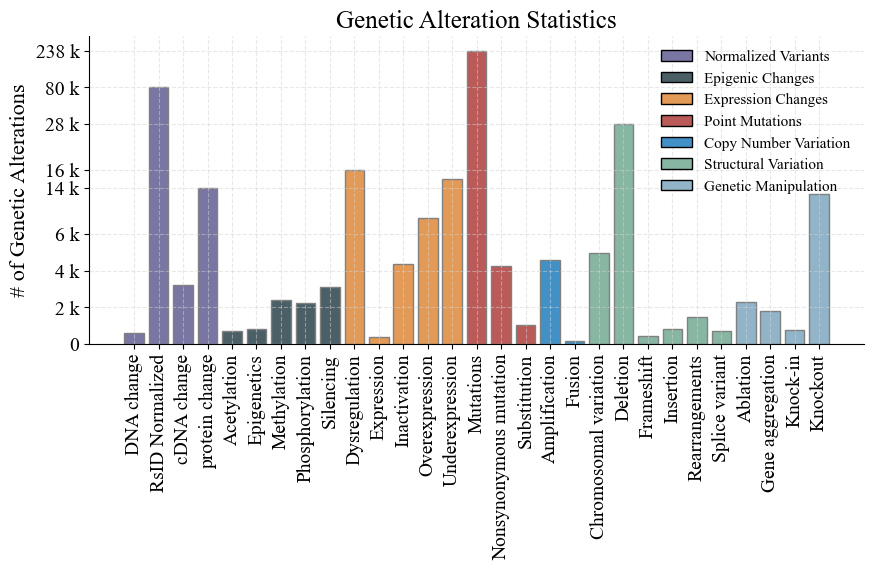

In [269]:
# 开始绘制柱状图


fig_save_path = '/mnt/disk1/xzyao/AD-PNRLE/AD-Alterome调整-2024/result/paper_visualization'
fig_save_file = f'{fig_save_path}/genetic-alteration.bar.png'

bar_width = 0.8

plt.figure(figsize=(10, 4))


plt.bar(plot_sub_type_list, plot_sub_type_count_list, color=plot_sub_type_color_list, 
        width=bar_width, edgecolor='#808080')


_ = plt.xticks(fontsize=14, fontname='Times New Roman',rotation=90)


#_ = plt.yticks([16000, 14000, 12000, 9500, 9000, 8500, 8000, 6000, 4000, 2000, 0],
#           ['238 k','80 k', '28 k', '16 k',  '15 k', '14 k', '13 k', '6k', '4k', '2 k', '0'],
#           fontsize=20, fontname='Times New Roman')
_ = plt.yticks([16000, 14000, 12000, 9500, 8500, 6000, 4000, 2000, 0],
           ['238 k','80 k', '28 k', '16 k', '14 k', '6 k', '4 k', '2 k', '0'],
           fontsize=14, fontname='Times New Roman')
plt.ylabel('# of Genetic Alterations',
           fontsize=16, fontname='Times New Roman')

# 隐藏坐标轴
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)

# 定制一个legend'
patches = [mpatches.Patch(facecolor=color, edgecolor='black',
                          label=label.title()) for label, color in unique_color_label.items()]
plt.legend(handles=patches, frameon=False, loc='upper right',
           prop={'family': 'Times New Roman', 'size': 11})

plt.title("Genetic Alteration Statistics", fontsize=18, fontname='Times New Roman')


plt.grid(color='lightgray', linestyle='--', alpha=0.5)


plt.savefig(fig_save_file, dpi=360, bbox_inches='tight')
print(f'{fig_save_file} saved.')